Code to demonstrate fastcda stability analysis which does multiple resampling without replacement of a dataset, searchs for a model.  The edges that reach a specified proportion are considered **stable** edges.

In [1]:
# import needed packages
from fastcda import FastCDA
from dgraph_flex import DgraphFlex
import semopy
import pprint as pp

In [2]:
# create  an instance of FastCDA
fc = FastCDA()

In [3]:
# read in the sample ema dataset and view it
df = fc.getEMAData()
df

,alcohol_bev,TIB,TST,PANAS_PA,PANAS_NA,worry_scale,PHQ9
0,1.0,9.00,7.333333,44.0,13.0,8.0,0.0
1,0.0,10.25,8.750000,40.0,12.0,14.0,0.0
2,1.0,8.50,7.166667,39.0,12.0,15.0,0.0
3,1.0,8.75,8.083333,39.0,12.0,12.0,0.0
4,1.0,8.25,6.666667,38.0,13.0,15.0,0.0
...,...,...,...,...,...,...,...
636,4.0,8.75,7.916667,29.0,12.0,17.0,3.0
637,4.0,8.50,7.666667,31.0,12.0,17.0,4.0
638,3.0,8.50,7.583333,33.0,13.0,17.0,3.0
639,3.0,9.00,8.166667,31.0,12.0,19.0,2.0


In [4]:
# add the lags, with a suffix of '_lag'
df_lag = fc.add_lag_columns(df, lag_stub='_lag')
df_lag

,alcohol_bev,TIB,TST,PANAS_PA,PANAS_NA,worry_scale,PHQ9,alcohol_bev_lag,TIB_lag,TST_lag,PANAS_PA_lag,PANAS_NA_lag,worry_scale_lag,PHQ9_lag
0,0.0,10.25,8.750000,40.0,12.0,14.0,0.0,1.0,9.00,7.333333,44.0,13.0,8.0,0.0
1,1.0,8.50,7.166667,39.0,12.0,15.0,0.0,0.0,10.25,8.750000,40.0,12.0,14.0,0.0
2,1.0,8.75,8.083333,39.0,12.0,12.0,0.0,1.0,8.50,7.166667,39.0,12.0,15.0,0.0
3,1.0,8.25,6.666667,38.0,13.0,15.0,0.0,1.0,8.75,8.083333,39.0,12.0,12.0,0.0
4,0.0,8.25,7.416667,37.0,12.0,16.0,0.0,1.0,8.25,6.666667,38.0,13.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,4.0,8.75,7.916667,29.0,12.0,17.0,3.0,6.0,7.00,6.166667,31.0,15.0,18.0,3.0
636,4.0,8.50,7.666667,31.0,12.0,17.0,4.0,4.0,8.75,7.916667,29.0,12.0,17.0,3.0
637,3.0,8.50,7.583333,33.0,13.0,17.0,3.0,4.0,8.50,7.666667,31.0,12.0,17.0,4.0
638,3.0,9.00,8.166667,31.0,12.0,19.0,2.0,3.0,8.50,7.583333,33.0,13.0,17.0,3.0


In [5]:
# standardize the data
df_lag_std = fc.standardize_df_cols(df_lag)
df_lag_std

,alcohol_bev,TIB,TST,PANAS_PA,PANAS_NA,worry_scale,PHQ9,alcohol_bev_lag,TIB_lag,TST_lag,PANAS_PA_lag,PANAS_NA_lag,worry_scale_lag,PHQ9_lag
0,-0.720086,0.945596,0.714807,1.403653,-0.442144,-1.025409,-0.961531,-0.045027,0.019757,-0.338939,1.808615,-0.237832,-1.969207,-0.960600
1,-0.048041,-0.349371,-0.463029,1.300809,-0.442144,-0.866815,-0.961531,-0.719118,0.944940,0.714883,1.398222,-0.442144,-1.020311,-0.960600
2,-0.048041,-0.164376,0.218876,1.300809,-0.442144,-1.342597,-0.961531,-0.045027,-0.350317,-0.462918,1.295624,-0.442144,-0.862161,-0.960600
3,-0.048041,-0.534367,-0.834977,1.197966,-0.237832,-0.866815,-0.961531,-0.045027,-0.165280,0.218966,1.295624,-0.442144,-1.336610,-0.960600
4,-0.720086,-0.534367,-0.277055,1.095122,-0.442144,-0.708221,-0.961531,-0.045027,-0.535353,-0.834856,1.193025,-0.237832,-0.862161,-0.960600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.968095,-0.164376,0.094893,0.272375,-0.442144,-0.549627,0.053947,3.325425,-1.460537,-1.206793,0.474838,0.170792,-0.387713,0.054453
636,1.968095,-0.349371,-0.091081,0.478062,-0.442144,-0.549627,0.392440,1.977244,-0.165280,0.094987,0.269641,-0.442144,-0.545863,0.054453
637,1.296050,-0.349371,-0.153072,0.683748,-0.237832,-0.549627,0.053947,1.977244,-0.350317,-0.090981,0.474838,-0.442144,-0.545863,0.392805
638,1.296050,0.020619,0.280867,0.478062,-0.442144,-0.232439,-0.284546,1.303154,-0.350317,-0.152971,0.680034,-0.237832,-0.545863,0.054453


In [8]:
# create the prior knowledge
knowledge = {'addtemporal': {
                0: 
                    [   'alcohol_bev_lag',
                        'TIB_lag',
                        'TST_lag',
                        'PANAS_PA_lag',
                        'PANAS_NA_lag',
                        'worry_scale_lag',
                        'PHQ9_lag'],
                1: 
                    [   'alcohol_bev',
                        'TIB',
                        'TST',
                        'PANAS_PA',
                        'PANAS_NA',
                        'worry_scale',
                        'PHQ9']
                        }
             }


In [11]:
# Run the search
SearchResult, graph = fc.run_model_search( df_lag_std, 
                                    model='gfci', 
                                    knowledge=knowledge, 
                                    score={'sem_bic': {'penalty_discount': 1.0}},
                                    test={'fisher_z': {'alpha': .01}})


In [13]:
# searchResult has multiple keys, the one we are generally interested in is 'edges'
print(f"Number of edges found: {len(SearchResult['edges'])} edges.")
SearchResult['edges']

Number of edges found: 22 edges.


['TIB_lag o-> TIB',
 'worry_scale_lag --> TST_lag',
 'PHQ9 --> PANAS_NA',
 'TST_lag --> TST',
 'PHQ9_lag <-> PANAS_NA_lag',
 'worry_scale --> PANAS_PA',
 'PANAS_NA_lag --> worry_scale_lag',
 'PANAS_NA --> worry_scale',
 'PANAS_PA_lag --> PHQ9_lag',
 'worry_scale --> TST',
 'PHQ9 <-> PANAS_NA_lag',
 'PANAS_PA_lag --> PANAS_PA',
 'worry_scale_lag --> worry_scale',
 'PANAS_NA <-> PANAS_NA_lag',
 'worry_scale_lag --> alcohol_bev_lag',
 'TIB <-> TST',
 'PHQ9_lag --> PHQ9',
 'TIB --> PANAS_NA',
 'PANAS_PA <-> PHQ9',
 'worry_scale_lag --> PANAS_PA_lag',
 'alcohol_bev_lag --> alcohol_bev',
 'TIB_lag o-> TST_lag']

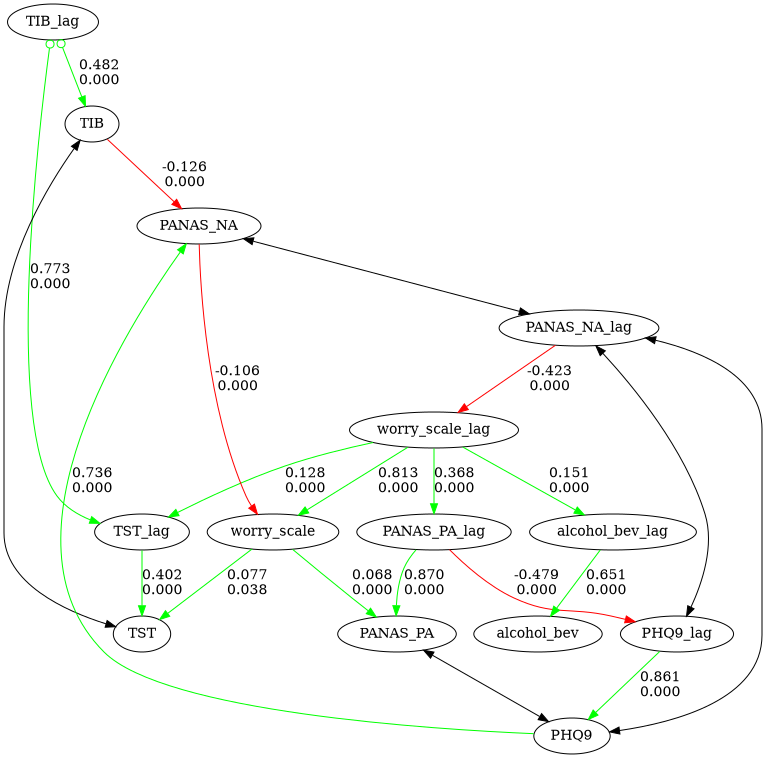

In [14]:
# Show the graph
graph.show_graph()

In the next section, we perform a stability analysis to determine which edges are most stable while resampling the data.

We do 100 runs using a subsample of 90% of the original data without substitution.

We keep edges that are present with at least a fraction of 0.75.

StabilityResult['edges'] contains the edges that were found 0.75 of the time.

A graph object is returned which includes the SEM results.

If the argument "lag_stub" is set to a string, then lag variables are added to the dataframe.

In [16]:
# run the stability search
StabilityResult, graph = fc.run_stability_search(
                                        df, 
                                        model='gfci',
                                        knowledge=knowledge,
                                        score={'sem_bic': {'penalty_discount': 1.0}},
                                        test={'fisher_z': {'alpha': .01}},
                                        lag_stub = '_lag',
                                        )

pass

Running stability search with 100 runs:   0%|          | 0/100 [00:00<?, ?run/s]


Search complete!


In [17]:
# number of edges
print(f"Number of edges found: {len(StabilityResult['edges'])} edges.")
StabilityResult['edges']

Number of edges found: 14 edges.


['PANAS_NA --> worry_scale',
 'worry_scale --> PANAS_PA',
 'worry_scale --> TST',
 'worry_scale_lag --> PANAS_PA_lag',
 'worry_scale_lag --> alcohol_bev_lag',
 'worry_scale_lag --> worry_scale',
 'PANAS_NA_lag --> worry_scale_lag',
 'PANAS_PA_lag --> PANAS_PA',
 'PHQ9_lag --> PHQ9',
 'TIB_lag o-> TIB',
 'TST_lag --> TST',
 'alcohol_bev_lag --> alcohol_bev',
 'PANAS_PA <-> PHQ9',
 'TIB <-> TST']

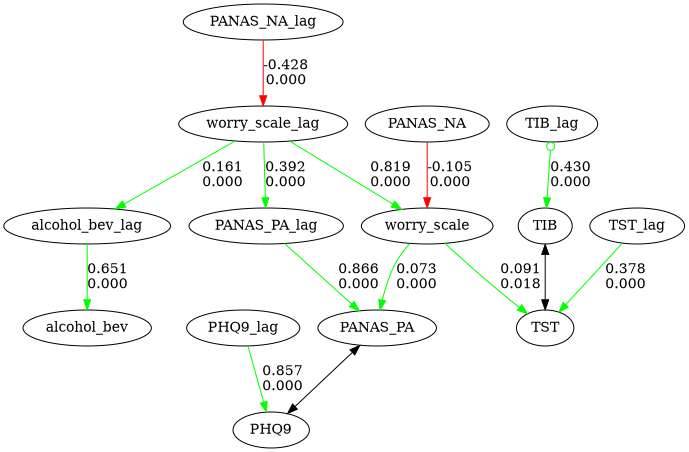

In [18]:
# show the graph
graph.show_graph()

The last graph was created using a threshold of 0.75 for an edge to be included in the graph.  Let's change the threshold to  0.9.

In [19]:
# Let's get a new set of edges based on the min_fraction of 0.9
frac = 0.90
selected_edges = fc.select_edges( StabilityResult['sorted_edge_counts'],
                                 min_fraction=frac)

# number of edges
print(f"Number of edges using a fraction  of {frac} produces {len(selected_edges)} edges.")
selected_edges

Number of edges using a fraction  of 0.9 produces 9 edges.


['PANAS_NA --> worry_scale',
 'worry_scale_lag --> worry_scale',
 'PANAS_PA_lag --> PANAS_PA',
 'PHQ9_lag --> PHQ9',
 'TIB_lag o-> TIB',
 'TST_lag --> TST',
 'alcohol_bev_lag --> alcohol_bev',
 'PANAS_PA <-> PHQ9',
 'TIB <-> TST']

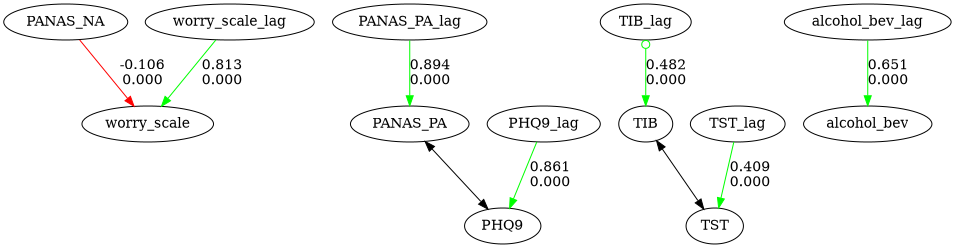

In [20]:
# run the sem and create a new graph
obj = DgraphFlex()
obj.add_edges(selected_edges)

# run the sem
lavaan_model = fc.edges_to_lavaan(selected_edges)
sem_results = fc.run_semopy(lavaan_model, df_lag_std)
# add the semopy results to the graph object
fc.add_sem_results_to_graph(obj, sem_results['estimates'])
# save the graph to a png file
obj.show_graph()